# Week 4 - Clustering
## Exercises

by [David Elliott](#DavidElliot), with minor editing by Cassandra Khan

Here we create a small table representing a small sample,  $n=6$  , and  $p=2$  features:

In [ ]:
import pandas as pd

data = pd.DataFrame([[1,4],[1,3],[0,4],[5,1],[6,2],[4,0]], columns = ["x_1", "x_2"])
data.index.name = "Obs."
display(data.head(6))

,x_1,x_2
Obs.,,
0,1,4
1,1,3
2,0,4
3,5,1
4,6,2
5,4,0


## Question 1.

This question asks you to manually perform K-means clustering manually, with $K=2$, on our small sample, $n=6$, and $p=2$ features.

Here is the same in table form:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x_1</th>
      <th>x_2</th>
    </tr>
    <tr>
      <th>Obs.</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>4</td>
    </tr>
    <tr>
      <th>3</th>
      <td>5</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>2</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

a. Here we create a scatter plot which represents the observations:

Text(0, 0.5, '$\\mathbf{x}_2$')

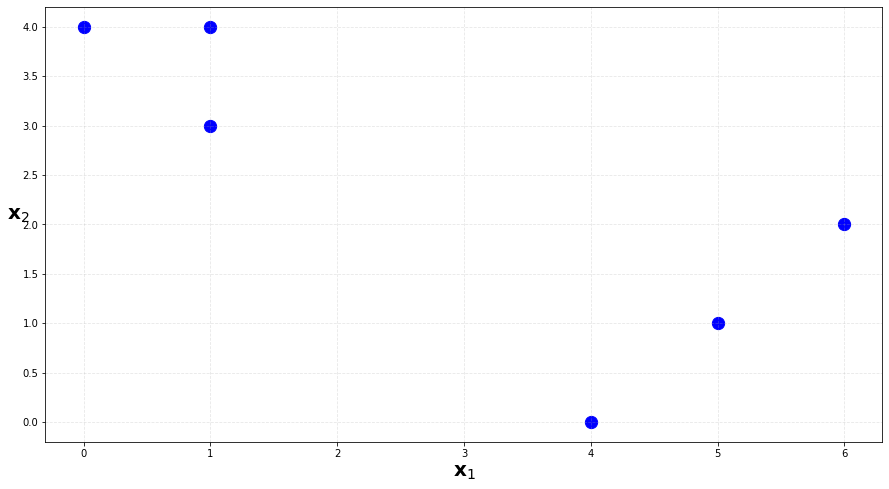

In [ ]:
import matplotlib.pyplot as plt

x1 = [1,1,0,5,6,4]
x2 = [4,3,4,1,2,0]
fig = plt.figure(figsize=(15,8))
plt.grid(linestyle='--', alpha=0.3)
plt.scatter(x1, x2, c='blue', s=150)
plt.xlabel('$\mathbf{x}_1$', size=20)
plt.ylabel('$\mathbf{x}_2$', size=20, rotation=0)

b. Randomly assign a cluster label to each observation. In Python you can use <code>np.random.randint</code>. 

In order (#1 first, #2 second):

1.   
Create a table like the one above, placing the cluster labels for each observation in a new column.
2.   Plot your results, and make sure to label your axes!







In [ ]:
import numpy as np

np.random.seed(42)
#-v-v-v-v- Create a Table. Write your code here -v-v-v-v-
cluster_labels = np.random.randint(2, size=6)
data['labels'] = cluster_labels
display(data.head(6))

,x_1,x_2,labels
Obs.,,,
0,1,4,0
1,1,3,1
2,0,4,0
3,5,1,0
4,6,2,0
5,4,0,1


Text(0, 0.5, '$\\mathbf{x}_2$')

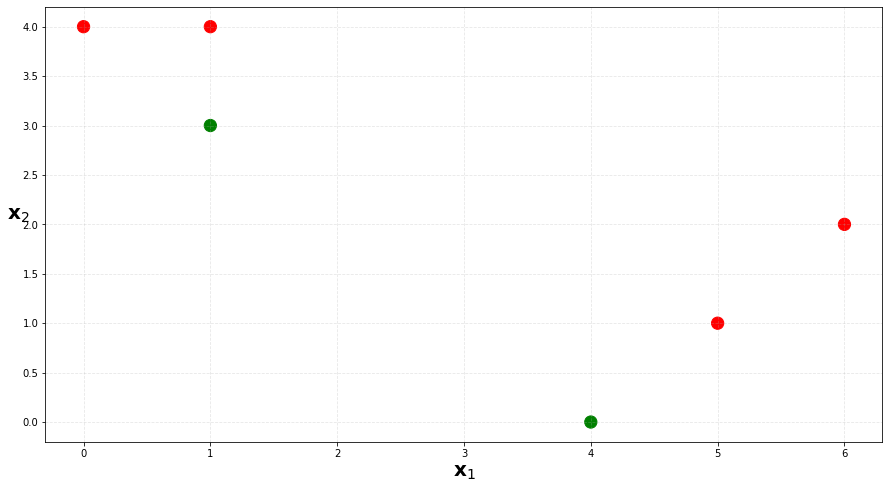

In [ ]:
#-v-v-v-v- Plot your randomly- clustered data. Write your code here -v-v-v-v-
#-v-v-v-v- Use red for one cluster, green for the other -v-v-v-v-
color= ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize=(15,8))
plt.grid(linestyle='--', alpha=0.3)
plt.scatter(x1, x2, c=color, s=150)
plt.xlabel('$\mathbf{x}_1$', size=20)
plt.ylabel('$\mathbf{x}_2$', size=20, rotation=0)

<details open><summary>Click here for answer</summary>
    <table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x_1</th>
      <th>x_2</th>
      <th>labels</th>
    </tr>
    <tr>
      <th>Obs.</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>4</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>3</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>4</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>5</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>2</td>
      <td>0</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
    
These labels, and subsequent answers, will depend on the random seed you set (I used <code>np.random.seed(42)</code>)
</details>

c. Compute the centroid for each ***randomly-assigned*** cluster, and plot your results.
NB: You have the code for plotting the points, from the above exercise. A suggested structure for plotting a centroid would be:

plt.scatter(mean_data.loc[0]["x_1"], mean_data.loc[0]["x_2"], c='red', s=150, marker = 'x', linewidths=4)

Text(0, 0.5, '$\\mathbf{x}_2$')

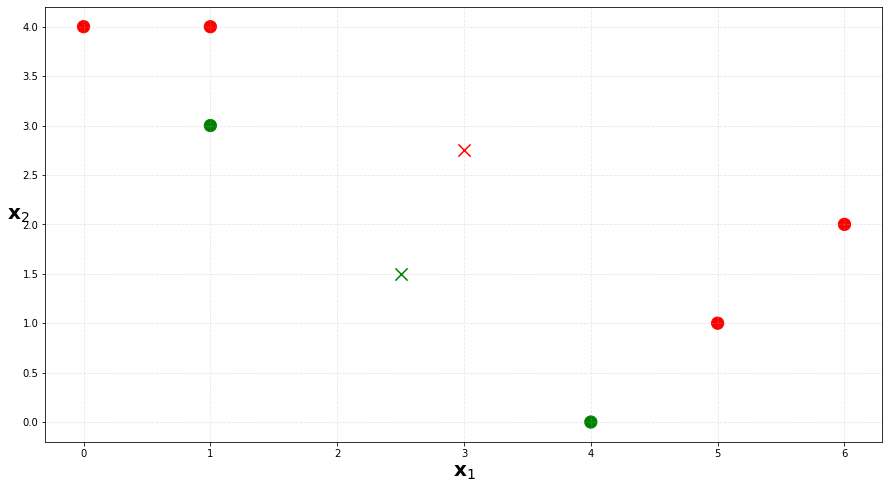

In [ ]:
mean_data = data.groupby('labels').mean()

fig = plt.figure(figsize=(15,8))
plt.grid(linestyle='--', alpha=0.3)
plt.scatter(x1, x2, c=color, s=150)
#-v-v-v-v- Plot both the scatterplot and the centroids in one plot. Write your code here -v-v-v-v-
plt.scatter(mean_data.loc[0]["x_1"], mean_data.loc[0]["x_2"], c='red', s=150, marker = 'x', linewidths=4)
plt.scatter(mean_data.loc[1]["x_1"], mean_data.loc[1]["x_2"], c='green', s=150, marker = 'x', linewidths=4)
plt.xlabel('$\mathbf{x}_1$', size=20)
plt.ylabel('$\mathbf{x}_2$', size=20, rotation=0)

Describe analytically (words and equations), how you calculate the centroids for both the red and green clusters.

Please write your answer here:

<details open><summary>Click here for answer</summary>
    We can compute the centroid for the red cluster with
    $$
    \begin{align}
    \bar x_{11} & = \frac{1}{4}(0+1+5+6) \\ 
                & = 3 \\
    \\
    \bar x_{12} & = \frac{1}{4}(4+4+2+1) \\ 
                & = 2.75 \\
    \\
    \end{align}
    $$
    and the green cluster with
    $$
    \begin{align}
    \bar x_{21} & = \frac{1}{2}(1+4) \\
                & = 2.5   \\
    \\
    \bar x_{22} & = \frac{1}{2}(3+0) \\ 
                & = 1.5 \\
    \\
    \end{align}
</details>

d. Now, assign each observation **to the centroid to which it is closest**, in terms of Euclidean distance. 

As before (#1 first, #2 second):

1.   
Create a table like the one above, placing the **new** cluster labels for each observation in a new column.
An efficient way to do this is with a for loop, creating two distancess which you can then compare, e.g.

$\text{dist_0} = (x1[idx] - \text{mean_data.loc}[0]["x_1"])^2 + (x2[idx] - \text{mean_data.loc}[0]["x_2"])^2$

2.   Plot your results, and make sure to label your axes!

In [ ]:
for idx, cluster in enumerate(cluster_labels):
  #-v-v-v-v- write code to calculate two distances -v-v-v-v-
    dist_0 = (x1[idx] - mean_data.loc[0]["x_1"])**2 + (x2[idx] - mean_data.loc[0]["x_2"])**2
    dist_1 = (x1[idx] - mean_data.loc[1]["x_1"])**2 + (x2[idx] - mean_data.loc[1]["x_2"])**2
    if dist_0 > dist_1:
      #-v-v-v-v- Assign a value to cluster_labels[idx] -v-v-v-v-
        cluster_labels[idx] = 0
    else:
      #-v-v-v-v- Assign a different value to cluster_labels[idx] -v-v-v-v-
        cluster_labels[idx] = 1
        
data['labels'] = cluster_labels
display(data.head(6))

,x_1,x_2,labels
Obs.,,,
0,1,4,1
1,1,3,1
2,0,4,1
3,5,1,0
4,6,2,1
5,4,0,0


Text(0, 0.5, '$\\mathbf{x}_2$')

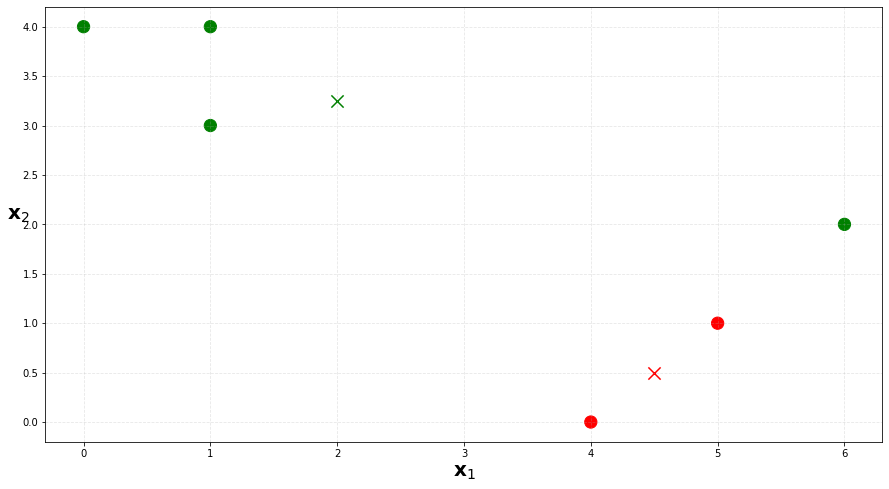

In [ ]:
color= ['red' if l == 0 else 'green' for l in cluster_labels]
mean_data = data.groupby('labels').mean()
fig = plt.figure(figsize=(15,8))
plt.grid(linestyle='--', alpha=0.3)
plt.scatter(x1, x2, c=color, s=150)
#-v-v-v-v- Plot both the scatterplot and the new centroids in one plot. Write your code here -v-v-v-v-
plt.scatter(mean_data.loc[0]["x_1"], mean_data.loc[0]["x_2"], c='red', s=150, marker = 'x', linewidths=4)
plt.scatter(mean_data.loc[1]["x_1"], mean_data.loc[1]["x_2"], c='green', s=150, marker = 'x', linewidths=4)
plt.xlabel('$\mathbf{x}_1$', size=20)
plt.ylabel('$\mathbf{x}_2$', size=20, rotation=0)

<details open><summary>Click here for answer</summary>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>x_1</th>
      <th>x_2</th>
      <th>labels</th>
    </tr>
    <tr>
      <th>Obs.</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>4</td>
      <td>1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>3</td>
      <td>1</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>4</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>5</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>6</td>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</details>

e. Find the final position of the k-means clusters (e.g. where the answer to questions (c) and (d) stops changing), then color your plot according to these new cluster labels.

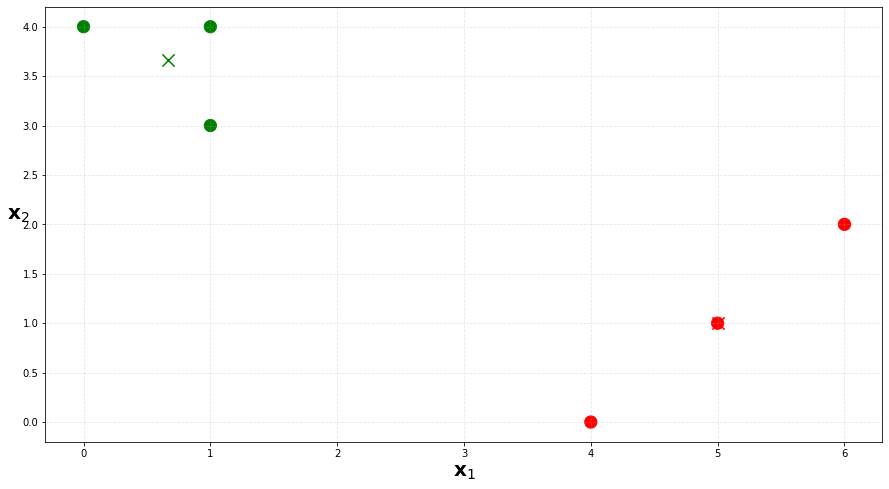

In [ ]:
from sklearn.cluster import KMeans

M = np.column_stack((x1,x2))
#-v-v-v-v- Choose value for the number of clusters and the random state -v-v-v-v-
kmeans = KMeans(n_clusters=2, random_state=0).fit(M)
cluster_labels = kmeans.labels_

#-v-v-v-v- Plot both the scatterplot and the new centroids in one plot. Write your code here -v-v-v-v-
#-v-v-v-v- See the plotting commands for 1b, 1c, 1d -v-v-v-v-
color= ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize=(15,8))
plt.scatter(x1, x2, c=color, s=150)
plt.scatter(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='red', s=150, marker = 'x', linewidths=4)
plt.scatter(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='green', s=150, marker = 'x', linewidths=4)
plt.xlabel('$\mathbf{x}_1$', size=20)
plt.ylabel('$\mathbf{x}_2$', size=20, rotation=0)
plt.grid(linestyle='--', alpha=0.3)

## Question 2.

Describe two techniques to help select the number of clusters when using K-Means.

<details open><summary>Click here for answer</summary>
    
1. The elbow rule is a simple techinique to select the number of clusters using k-means. Using the mean squared distance from each instance to its nearest centroid (inertia), and the number of clusters, we can plot a curve and find where the inetria stops dropping quickly (the "elbow").
    
2. You could also plot a silhoutte score as a function of the number of clusters. Silhouette coefficients vary from +1 for instances well within their clusters and far from oteher clusters, and -1 for instances close to another cluster.
</details>

## Question 3.
### See *The Hierarchical Clustering Algorithm / Dissimilarity Measure* (pp. 27 - 32 of the Week 4 lecture notes􏰗􏰌􏰕􏰕􏰌􏰤􏰌􏰄􏰊􏰗􏰌􏰕􏰕􏰌􏰤􏰌􏰄􏰊􏰉􏰌􏰖􏰩 􏰞􏰅􏰊).
Suppose we have a dissimilarity matrix as follows:

$$\begin{bmatrix} 
& 0.3 & 0.4 & 0.7 \\
0.3 & & 0.5 & 0.8 \\
0.4 & 0.5 & & 0.45 \\
0.7 & 0.8 & 0.45 & \\
\end{bmatrix}$$

This means the dissimilarity between the first and second observation is 0.3, second and fourth is 0.8 ect.

 a. Code a diagram that results from hierarchically clustering these four observations using __complete__ linkage.

1. Plot your results as a dendrogram, titled "Complete Linkage".

2. Using the dendrogram results, Create a table, placing the **new** cluster labels for each observation in a new column.

Text(0.5, 1.0, 'Complete Linkage')

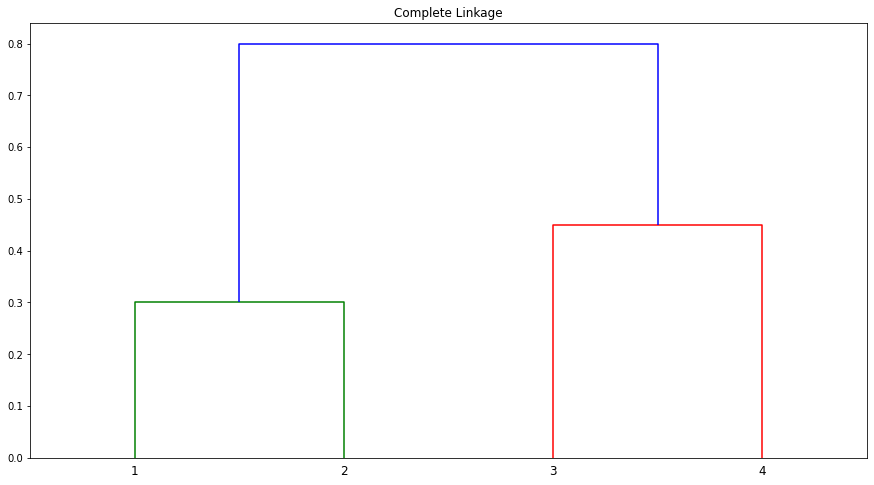

In [ ]:
# ------
# Simple
# ------
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

#-v-v-v-v- Create an array using np.array -v-v-v-v-
#dis_mat = np.array([[], [], [], []])
dis_mat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
#-v-v-v-v- Calculate distances using dists = squareform() -v-v-v-v-
dists = squareform(dis_mat)
#-v-v-v-v- Create a linkage matrix using linkage( ___ , "complete") -v-v-v-v-
linkage_matrix = linkage(dists, "complete")

fig = plt.figure(figsize=(15,8))
#-v-v-v-v- Plot the linkage matrix using dendrogram( ___ , labels=["1", "2", "3", "4"]) -v-v-v-v-
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Complete Linkage")

In [ ]:
import pandas as pd

# Using the answer above we could do this manually...
# --------
# Alternate Answer, done manually
# --------

columns =   ['row label 1', 'row label 2', 'distance', 'clust. item count']
cluster_1 = [0.           , 1.           , 0.3       , 2.]
cluster_2 = [2.           , 3.           , 0.45      , 2.]
# note that newly formed clusters are represented as a new row label (hense 4 and 5)
cluster_3 = [4.           , 5.           , 0.8       , 4.]

#-v-v-v-v- Create a dataframe for the table, using pd.DataFrame -v-v-v-v-
# data = pd.DataFrame([cluster_1,cluster_2,cluster_3],
#             columns= _____________,
#             index=['cluster %d' % (i + 1)
#                    for i in range(3)])
data = pd.DataFrame([cluster_1,cluster_2,cluster_3],
             columns=columns,
             index=['cluster %d' % (i + 1)
                    for i in range(3)])
display(data.head())

,row label 1,row label 2,distance,clust. item count
cluster 1,0.0,1.0,0.30,2.0
cluster 2,2.0,3.0,0.45,2.0
cluster 3,4.0,5.0,0.80,4.0


<details open><summary>Click here for answer</summary>

Beginning with 
$$\begin{bmatrix} 
& 0.3 & 0.4 & 0.7 \\
0.3 & & 0.5 & 0.8 \\
0.4 & 0.5 & & 0.45 \\
0.7 & 0.8 & 0.45 & \\
\end{bmatrix}$$

we see that 0.3 is the minimum dissimilarity, so we fuse observations 1 and 2 to form the cluster (1,2) at height 0.3. This leaves our similarity matrix as:

$$\begin{bmatrix} 
& 0.5 & 0.8 \\
0.5 & & 0.45 \\
0.8 & 0.45 & \\
\end{bmatrix}$$


because we are recording the _largest_ dissimilarities. For example, looking at the similarities between observations 1, 2, and 3, in our original matrix, we see that the dissimilarity between 1 and 3 is 0.4, and between 2 and 3 is 0.5. We pick 0.5 because it is the larger of the two, and this now represents the dissimilarity between our cluster (1,2) and 3. If you think in dataframes like me this may help to see this new matrix as:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>(1,2)</th>
      <th>3</th>
      <th>4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>(1,2)</th>
      <td>0.00</td>
      <td>0.50</td>
      <td>0.80</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.50</td>
      <td>0.00</td>
      <td>0.45</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.80</td>
      <td>0.45</td>
      <td>0.00</td>
    </tr>
  </tbody>
</table>
Now we continue to do this. We see that the minimum dissimilarity is 0.45, so we fuse observations 3 and 4 to form cluster (3,4) at height 0.45. We now have the new dissimilarity matrix:
$$\begin{bmatrix} 
& 0.8 \\
0.8 & \\
\end{bmatrix}$$
This means all that is left to fuse is clusters (1,2) and (3,4) to form cluster ((1,2),(3,4)) at height 0.8.
</details>

b. Suppose we cut the dendogram from question (a) such that two there are two clusters, which observations are in which cluster?

<details open><summary>Click here for answer</summary>
In this case, we have clusters (1,2) and (3,4).
</details>

c. Sketch or code a diagram that results from hierarchically clustering these four observations using __single__ linkage.

Text(0.5, 1.0, 'Single Linkage')

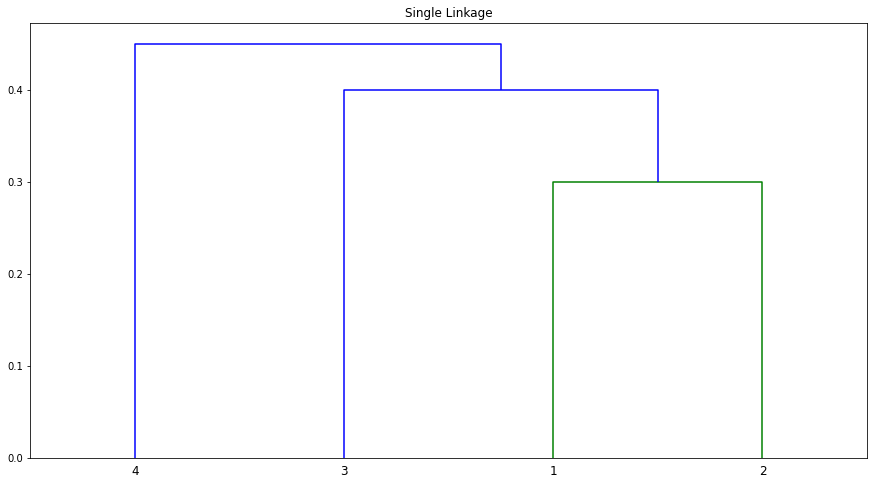

In [ ]:
#-v-v-v-v- As above, Create a linkage matrix using linkage( ___ , "single") -v-v-v-v-
linkage_matrix = linkage(dists, "single")
#-v-v-v-v- Plot the results -v-v-v-v
fig = plt.figure(figsize=(15,8))
dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.title("Single Linkage")

<details open><summary>Click here for answer</summary>

Beginning with 
$$\begin{bmatrix} 
& 0.3 & 0.4 & 0.7 \\
0.3 & & 0.5 & 0.8 \\
0.4 & 0.5 & & 0.45 \\
0.7 & 0.8 & 0.45 & \\
\end{bmatrix}$$

we see that 0.3 is the minimum dissimilarity, so we fuse observations 1 and 2 to form the cluster (1,2) at height 0.3. This leaves our similarity matrix as:
$$\begin{bmatrix} 
& 0.4 & 0.7 \\
0.4 & & 0.45 \\
0.7 & 0.45 & \\
\end{bmatrix}$$
because we are recording the _smallest_ dissimilarities. 
    
We now see that the minimum dissimilarity is 0.4, so we fuse cluster (1,2) and observation 3 to form cluster ((1,2),3) at height 0.4. We now have the new dissimilarity matrix:
$$\begin{bmatrix} 
& 0.45 \\
0.45 & \\
\end{bmatrix}$$
It remains to fuse clusters ((1,2),3) and observation 4 to form cluster (((1,2),3),4) at height 0.45.
</details>

d. Suppose we cut the dendogram from question (c) such that two there are two clusters, which observations are in which cluster?

<details open><summary>Click here for answer</summary>
In this case, we have clusters ((1,2),3) and (4).
</details>